In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [33]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [34]:
# Features & Target
X = df["Review Text"]
y = df["Recommended IND"]

In [35]:
# Text Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_cleaned = X.fillna('') # Fill NaN values with empty strings
X_vec = vectorizer.fit_transform(X_cleaned)

In [36]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2)

In [37]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.888250319284802
Precision: 0.8982322025800287
Recall   : 0.9743456854107282
F1 Score : 0.9347420758234929


In [40]:
# KNOWLEDGE BASED MODEL
def recommend_rule(review):
    review = review.lower()

    if "love" in review or "great" in review or "perfect" in review:
        return 1
    elif "bad" in review or "poor" in review or "disappointed" in review:
        return 0
    else:
        return "Neutral"

In [41]:
# Apply rule
df["KB_Pred"] = df["Review Text"].fillna("").apply(recommend_rule)

In [42]:
# Keep only binary predictions
df_kb = df[df["KB_Pred"] != "Neutral"]

In [43]:
# Convert to int
y_true = df_kb["Recommended IND"]
y_pred = df_kb["KB_Pred"].astype(int)

In [44]:
# Metrics
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

Accuracy : 0.8747218663610006
Precision: 0.8810073452256033
Recall   : 0.9876872402164536
F1 Score : 0.9313022258374621


In [45]:
print(recommend_rule("I love this dress"))
print(recommend_rule("poor quality product"))

1
0


In [46]:
from sklearn.cluster import KMeans

In [47]:
# CLUSTERING MODEL
# Vectorize
vectorizer = TfidfVectorizer(stop_words="english")
cleaned_reviews = df["Review Text"].fillna('')
X_vec = vectorizer.fit_transform(cleaned_reviews)

In [48]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3)
df["Cluster"] = kmeans.fit_predict(X_vec)

In [49]:
print(df[["Review Text", "Cluster"]].head())

                                         Review Text  Cluster
0  Absolutely wonderful - silky and sexy and comf...        2
1  Love this dress!  it's sooo pretty.  i happene...        1
2  I had such high hopes for this dress and reall...        1
3  I love, love, love this jumpsuit. it's fun, fl...        2
4  This shirt is very flattering to all due to th...        2


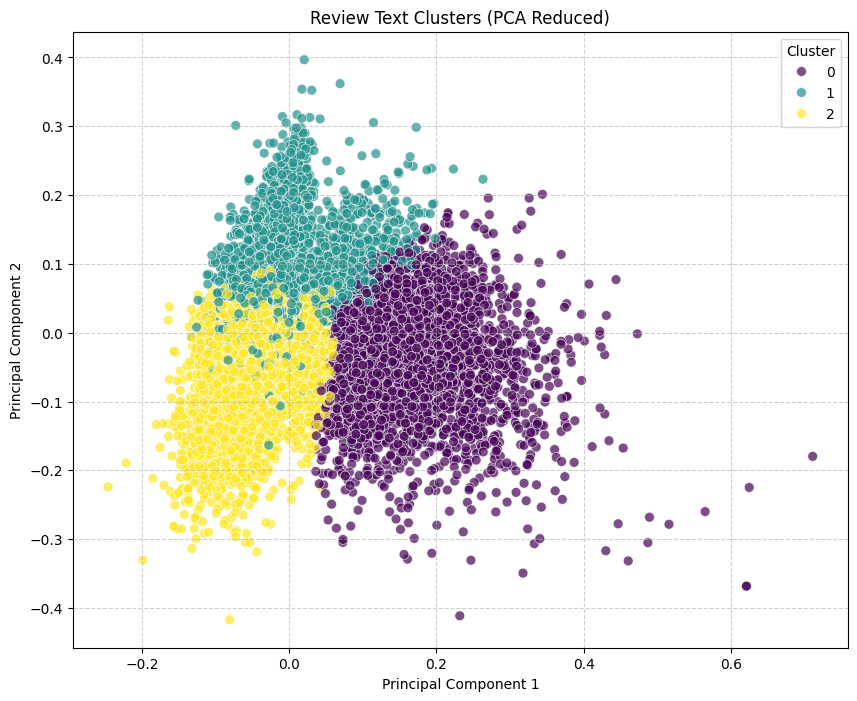

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensionality of TF-IDF vectors using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = df['Cluster']

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=plot_df, palette='viridis', s=50, alpha=0.7)
plt.title('Review Text Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [51]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_vec) # Changed X to X_vec
    inertia.append(kmeans.inertia_)

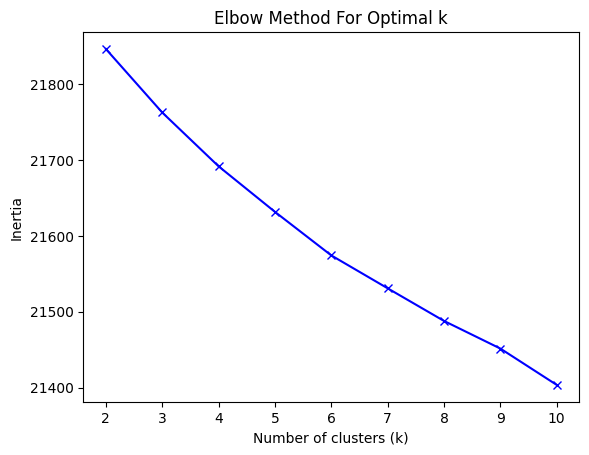

In [52]:
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow_plot.png')